## Housing Price EDA
Studi kasus: Melakukan Exploratory Data Analysis (EDA) terhadap dataset "Housing Price" dengan visualisasi 1D dan 2D

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Membaca dataset

In [2]:
house = pd.read_csv("train_house.csv")
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Menghapus nilai kosong (NaN)

In [4]:
house.dropna(axis=1, inplace=True)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

### Memisahkan data menjadi kategorikal dan numerik
**Data numerik**

In [6]:
numeric_cols = house.select_dtypes(include=np.number)
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [7]:
numeric_cols.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


**Data kategorikal**

In [8]:
categorical_cols = house.drop(numeric_cols, axis=1)
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [9]:
categorical_cols.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


## 1D Visualization
### Data Kategorikal
**Utilities**

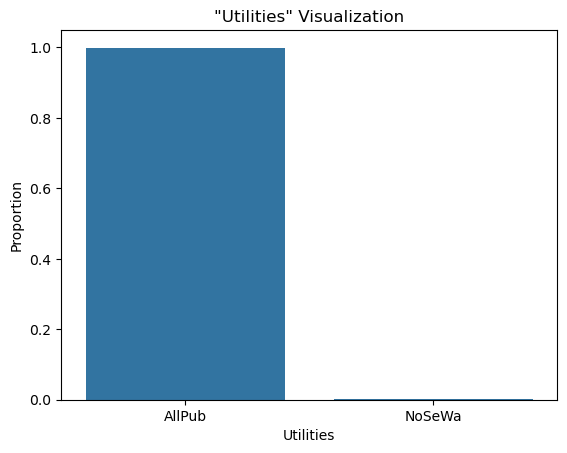

In [10]:
sns.barplot(
    x = categorical_cols["Utilities"].value_counts().index,
    y = categorical_cols["Utilities"].value_counts(normalize=True),
)
plt.title("\"Utilities\" Visualization")
plt.xlabel("Utilities")
plt.ylabel("Proportion")
plt.show()

Analisis:
* Variabel Utilities terdiri dari kategori fasilitas yang dimiliki setiap properti
* Fasilitas yang paling banyak diminati ("Utilities") adalah "AllPub" (nilai diagram hampir 100%)
* "AllPub" (*All Public Utilities*) adalah kategori properti yang menyediakan fasilitas lengkap seperti listrik, gas, air dan septic tank
* "NoSeWa" (*No Septic Tank and Water*) adalah kategori properti yang hanya menyediakan fasilitas listrik dan gas saja

**HouseStyle**

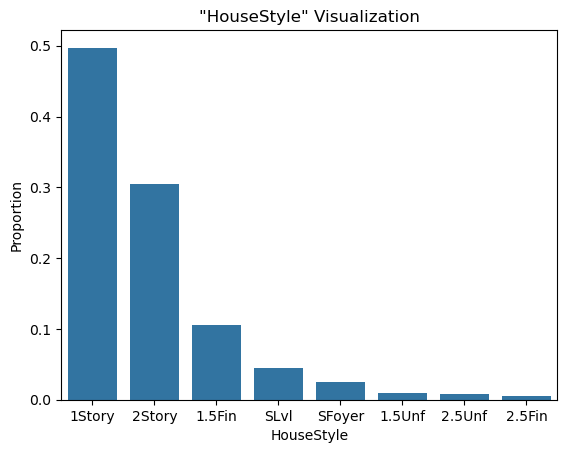

In [11]:
sns.barplot(
    x = categorical_cols["HouseStyle"].value_counts().index,
    y = categorical_cols["HouseStyle"].value_counts(normalize=True),
)
plt.title("\"HouseStyle\" Visualization")
plt.xlabel("HouseStyle")
plt.ylabel("Proportion")
plt.show()

Analisis:
* Variabel "HouseStyle" terdiri dari kategori gaya atau desain bangunan
* Hampir 50% properti merupakan "1Story" (properti dengan 1 lantai)
* Sekitar 30% properti adalah "2Story" (properti dengan 2 lantai)
* Sekitar 10% properti adalah "1.5Fin" (properti dengan model lantai *split level*)
* Banyaknya properti dengan desain lainnya seperti "SLvl", "SFoyer", "1.5Unf", "2.5Unf", dan "2.5Fin" kurang dari 5%

**ExterQual**

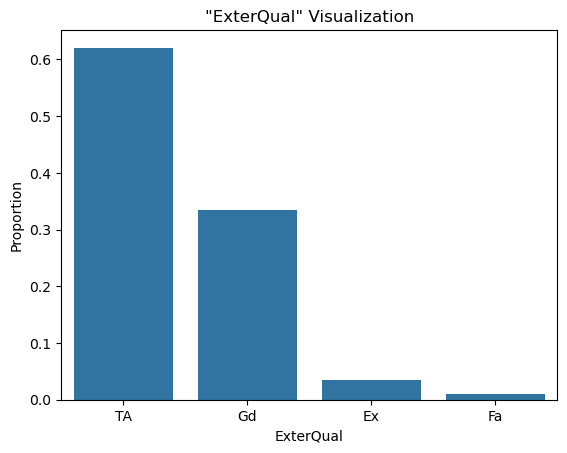

In [12]:
sns.barplot(
    x = categorical_cols["ExterQual"].value_counts().index,
    y = categorical_cols["ExterQual"].value_counts(normalize=True),
)
plt.title("\"ExterQual\" Visualization")
plt.xlabel("ExterQual")
plt.ylabel("Proportion")
plt.show()

Analisis:
* Variable "ExterQual" terdiri dari kategori kualitas bahan exterior properti, yaitu "TA" (*Typical/Aaverage*), "Gd" (*Good*), "Ex" (*Excellent*), dan "Fa" (*Fair*)
* Sekitar lebih dari 60% properti termasuk kategori "TA"
* Sekitar lebih dari 30% properti termasuk kategori "Gd"
* Banyaknya properti dengan kategori exterior "Ex" dan "Fa" kurang dari 5%

### Data Numerik

**SalePrice**

Mean = 180921.19589041095
Median = 163000.0
Std Dev = 79442.50288288663


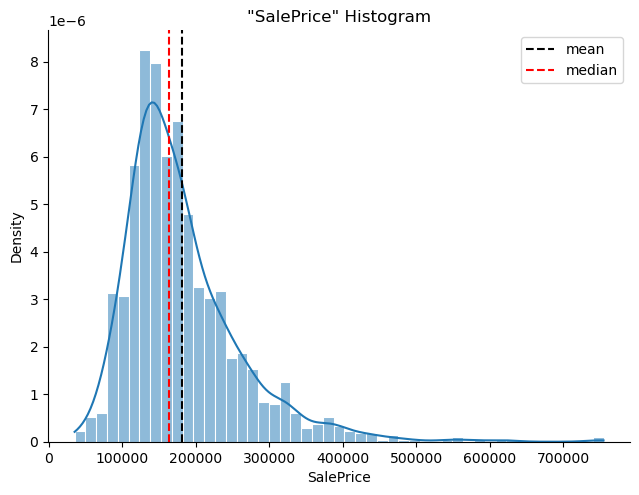

In [13]:
sale_price = pd.DataFrame(numeric_cols["SalePrice"])

sp_mean = sale_price["SalePrice"].mean()
sp_median = sale_price["SalePrice"].median()
sp_stddev = sale_price["SalePrice"].std()

sns.displot(sale_price, x="SalePrice", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(sp_mean, color="k", linestyle="--", label="mean")
line2 = plt.axvline(sp_median, color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", sp_mean)
print("Median =", sp_median)
print("Std Dev =", sp_stddev)
plt.title("\"SalePrice\" Histogram")
plt.show()

Analisis:
* Variabel "SalePrice" adalah harga properti yang dijual
* Sebaran/distribusi data *right-skewed*
* Sebagian besar data bernilai antara 100000 sampai 300000

Log-10 Transformation pada variabel "SalePrice"

Mean = 5.221978956475628
Median = 5.212187604403958
Std Dev = 0.17347974217176843


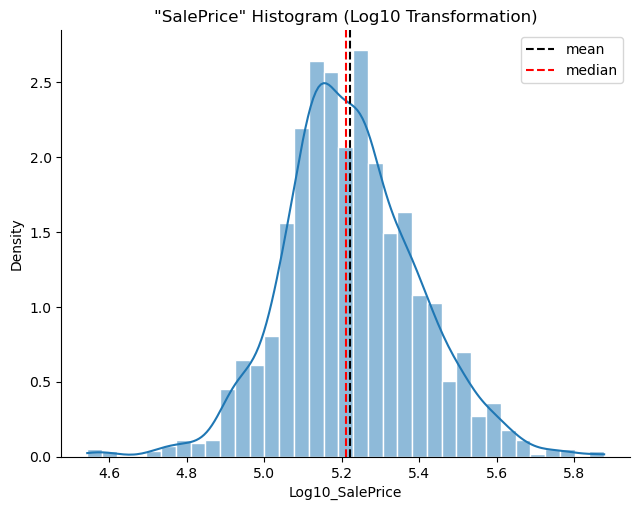

In [14]:
sale_price["Log10_SalePrice"] = np.log10(sale_price["SalePrice"])

sp_mean = sale_price["Log10_SalePrice"].mean()
sp_median = sale_price["Log10_SalePrice"].median()
sp_stddev = sale_price["Log10_SalePrice"].std()

sns.displot(sale_price, x="Log10_SalePrice", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(sp_mean, color="k", linestyle="--", label="mean")
line2 = plt.axvline(sp_median, color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", sp_mean)
print("Median =", sp_median)
print("Std Dev =", sp_stddev)
plt.title("\"SalePrice\" Histogram (Log10 Transformation)")
plt.show()

**GrLivArea**

Mean = 1515.463698630137
Median = 1464.0
Std Dev = 525.4803834232027


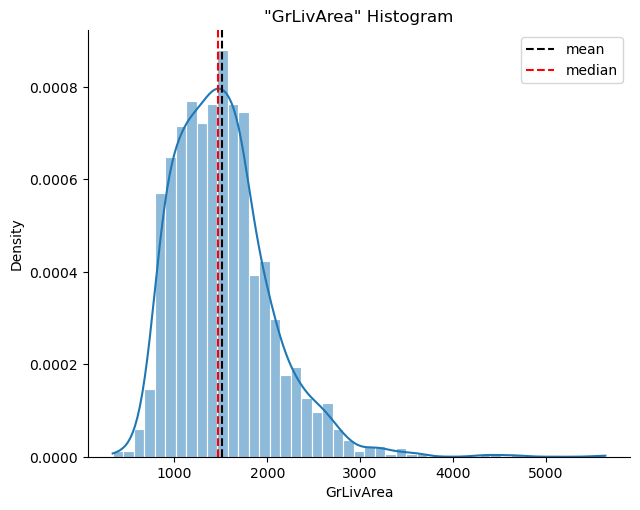

In [15]:
gr_liv_area = pd.DataFrame(numeric_cols["GrLivArea"])

grla_mean = gr_liv_area["GrLivArea"].mean()
grla_median = gr_liv_area["GrLivArea"].median()
grla_stddev = gr_liv_area["GrLivArea"].std()

sns.displot(gr_liv_area, x="GrLivArea", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(grla_mean, color="k", linestyle="--", label="mean")
line2 = plt.axvline(grla_median, color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", grla_mean)
print("Median =", grla_median)
print("Std Dev =", grla_stddev)
plt.title("\"GrLivArea\" Histogram")
plt.show()

Analisis:
* Variabel GrLivArea (Ground Living Area) adalah luas area properti di atas permukaan tanah
* Distribusi data *right-skewed*
* Sebagian besar data bernilai antara 1000 sampai 2000, menunjukkan sebagian besar properti memiliki luas area menengah (*mid-size*)

Log-10 Transformation pada variabel "GrLivArea"

Mean = 3.156354310389778
Median = 3.165541076722373
Std Dev = 0.14485910869663873


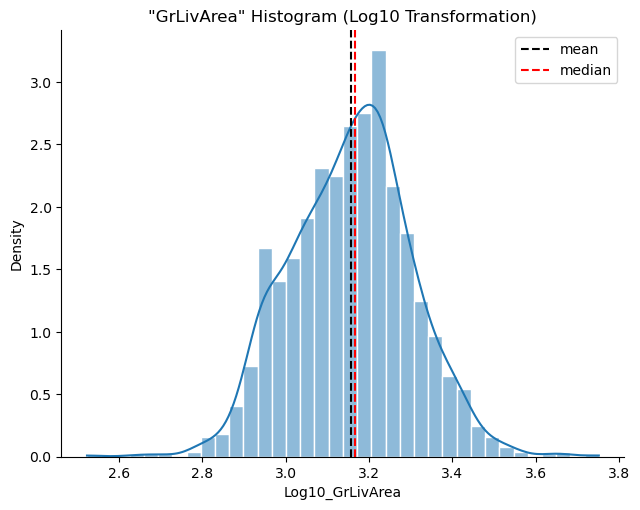

In [16]:
gr_liv_area["Log10_GrLivArea"] = np.log10(gr_liv_area["GrLivArea"])

grla_mean = gr_liv_area["Log10_GrLivArea"].mean()
grla_median = gr_liv_area["Log10_GrLivArea"].median()
grla_stddev = gr_liv_area["Log10_GrLivArea"].std()

sns.displot(gr_liv_area, x="Log10_GrLivArea", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(grla_mean, color="k", linestyle="--", label="mean")
line2 = plt.axvline(grla_median, color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", grla_mean)
print("Median =", grla_median)
print("Std Dev =", grla_stddev)
plt.title("\"GrLivArea\" Histogram (Log10 Transformation)")
plt.show()

**PoolArea**

Mean = 2.758904109589041
Median = 0.0
Std Dev = 40.17730694453043


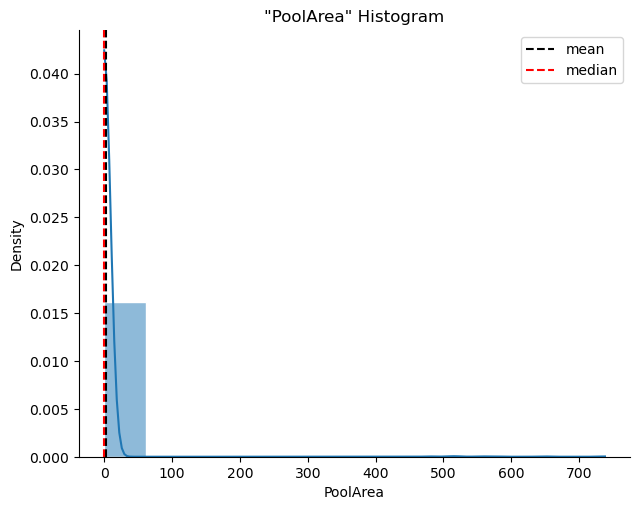

In [17]:
pool_area = pd.DataFrame(numeric_cols["PoolArea"])

pa_mean = pool_area["PoolArea"].mean()
pa_median = pool_area["PoolArea"].median()
pa_stddev = pool_area["PoolArea"].std()

sns.displot(pool_area, x="PoolArea", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(pa_mean, color="k", linestyle="--", label="mean")
line2 = plt.axvline(pa_median, color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", pa_mean)
print("Median =", pa_median)
print("Std Dev =", pa_stddev)
plt.title("\"PoolArea\" Histogram")
plt.show()

Analisis:
* Variabel PoolArea menggambarkan luas area kolam renang yang dimiliki properti
* Distribusi data *right-skewed* dan terdapat outlier
* Nilai variabel berada pada nilai 0, artinya semua properti kemungkinan tidak menyertakan data luas kolam renang atau memang tidak memiliki kolam renang

In [18]:
pool_area.describe()

,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


Membersihkan outlier pada variabel "PoolArea"

Mean = 0.0
Median = 0.0
Std Dev = 0.0


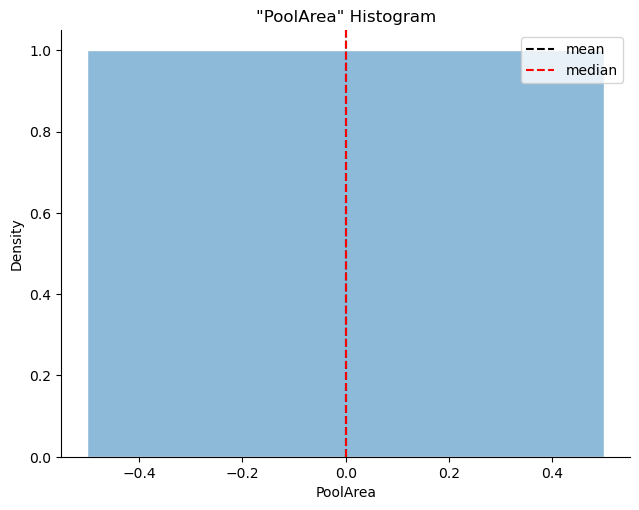

In [19]:
pool_area = pd.DataFrame(numeric_cols["PoolArea"][numeric_cols["PoolArea"] < 200])

pa_mean = pool_area["PoolArea"].mean()
pa_median = pool_area["PoolArea"].median()
pa_stddev = pool_area["PoolArea"].std()

sns.displot(pool_area, x="PoolArea", stat="density", kde=True, aspect=1.3, edgecolor="white")
line1 = plt.axvline(pool_area["PoolArea"].mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(pool_area["PoolArea"].median(), color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", pa_mean)
print("Median =", pa_median)
print("Std Dev =", pa_stddev)
plt.title("\"PoolArea\" Histogram")
plt.show()

Log-10 Transformation pada variabel "PoolArea"

d:\My_Personal_Project\test_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\My_Personal_Project\test_env\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Mean = 0.0
Median = 0.0
Std Dev = 0.0


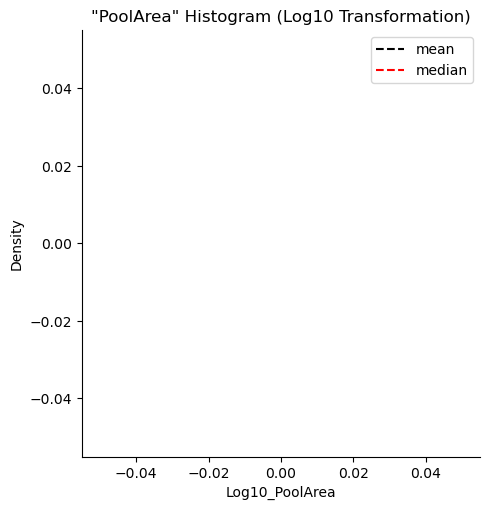

In [20]:
pool_area["Log10_PoolArea"] = np.log10(pool_area["PoolArea"])

pa_mean = pool_area["PoolArea"].mean()
pa_median = pool_area["PoolArea"].median()
pa_stddev = pool_area["PoolArea"].std()

sns.displot(pool_area, x="Log10_PoolArea", stat="density", kde=True, edgecolor="white")
line1 = plt.axvline(pool_area["Log10_PoolArea"].mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(pool_area["Log10_PoolArea"].median(), color="r", linestyle="--", label="median")
vis_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean =", pa_mean)
print("Median =", pa_median)
print("Std Dev =", pa_stddev)
plt.title("\"PoolArea\" Histogram (Log10 Transformation)")
plt.show()

## 2D Visualization

### Visualisasi hubungan antara variabel "GrLivArea" dengan "SalePrice"

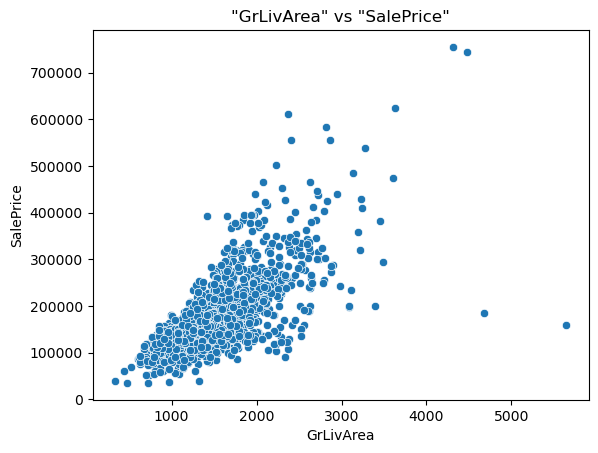

In [21]:
ax = sns.scatterplot(numeric_cols, x="GrLivArea", y="SalePrice")
plt.title("\"GrLivArea\" vs \"SalePrice\"")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Analisis:
* Visualisasi scatterplot menunjukkan variabel "GrLivArea" memiliki korelasi positif dengan variabel "SalePrice"
* Visualisasi menunjukkan semakin luas area properti, maka semakin tinggi harga jualnya
* Ada beberapa titik data yang menyempal jauh dari kumpulan titik-titik data, kemungkinan titik-titik tersebut adalah *outlier*

### Visualisasi hubungan antara variabel "GarageArea" dengan "SalePrice"

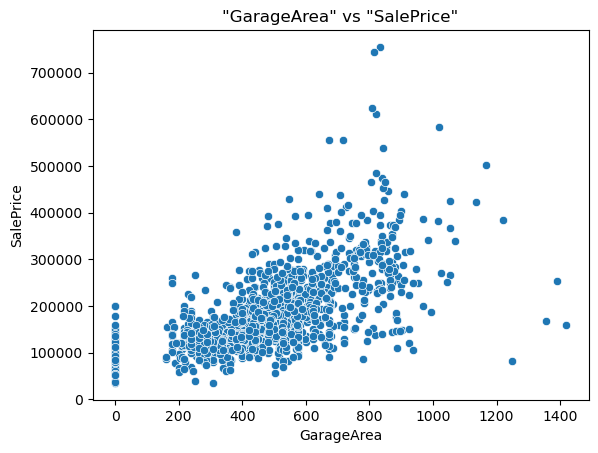

In [22]:
ax = sns.scatterplot(numeric_cols, x="GarageArea", y="SalePrice")
plt.title("\"GarageArea\" vs \"SalePrice\"")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

Analisis:
* Visualisasi scatterplot menunjukkan variabel "GarageArea" memiliki korelasi positif dengan variabel "SalePrice"
* Akan tetapi, ada beberapa titik data dengan nilai "GarageArea" = 0 yang secara logika seharusnya tidak memiliki harga jual
* Diperlukan penyaringan (*filter*) data dengan nilai "GarageArea" > 0

In [23]:
filtered_numeric_cols = numeric_cols[numeric_cols["GarageArea"] > 0]
filtered_numeric_cols.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


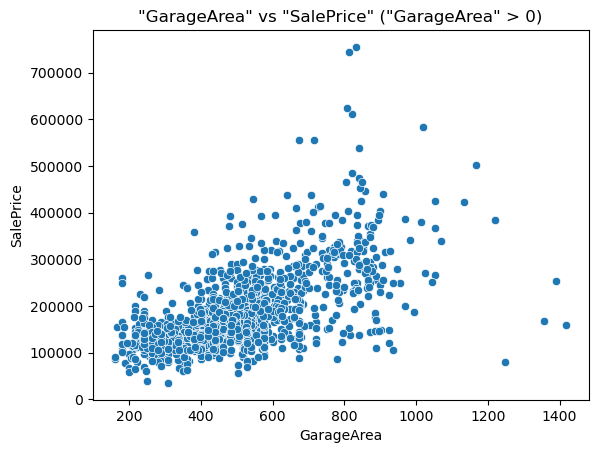

In [24]:
ax = sns.scatterplot(filtered_numeric_cols, x="GarageArea", y="SalePrice")
plt.title("\"GarageArea\" vs \"SalePrice\" (\"GarageArea\" > 0)")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

Analisis:
* Data dengan nilai "GarageArea" > 0 lebih masuk akal memiliki harga jual ("SalePrice")
* Variabel "GarageArea" memiliki korelasi positif dengan variabel "SalePrice", semakin luar area garasinya maka semakin tinggi harga jualnya
* Ada beberapa titik data yang menyempal jauh dari kumpulan data (*outlier*)

Menghitung korelasi antara antara variabel "GrLivArea" dengan "SalePrice"

In [25]:
cor_GrLivArea_SalePrice = numeric_cols["GrLivArea"].corr(numeric_cols["SalePrice"])
cor_GrLivArea_SalePrice

0.7086244776126518

Analisis: Nilai Korelasi antara variabel "GrLivArea" dengan "SalePrice" mendekati 1 (kuat)

Menghitung korelasi antara antara variabel "GarageArea" dengan "SalePrice"

In [26]:
cor_GarageArea_SalePrice = numeric_cols["GarageArea"].corr(numeric_cols["SalePrice"])
cor_GarageArea_SalePrice

0.6234314389183616

Analisis: Nilai Korelasi antara variabel "GarageArea" dengan "SalePrice" mendekati 1 (kuat)